In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from keras.models import Model

In [2]:
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [3]:
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [4]:
from keras import backend as k
if k.image_data_format() == 'channels_first':
  print('yes')
else: print('no')

no


In [5]:
def create_model():
  model = Sequential()
  inputShape = (28,28,1)
  classes = 10
  model.add(Conv2D(32, (5, 5), padding="same",input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # second set of CONV => RELU => POOL layers
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # first set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  # second set of FC => RELU layers
  model.add(Dense(64))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  model.summary()
  return model

In [6]:
def compile_model():
  INIT_LR = 1e-3
  opt = Adam(lr=INIT_LR)
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [7]:
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)

In [8]:
model = create_model()
compile_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [9]:
model.fit(trainX, trainY, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 43s 88ms/step - loss: 0.7103 - accuracy: 0.7628
Epoch 2/10
469/469 [==============================] - 40s 85ms/step - loss: 0.2594 - accuracy: 0.9247
Epoch 3/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1971 - accuracy: 0.9420
Epoch 4/10
469/469 [==============================] - 42s 89ms/step - loss: 0.1644 - accuracy: 0.9517
Epoch 5/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1430 - accuracy: 0.9578
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 0.1315 - accuracy: 0.9606
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.1184 - accuracy: 0.9659
Epoch 8/10
469/469 [==============================] - 38s 81ms/step - loss: 0.1075 - accuracy: 0.9682
Epoch 9/10
469/469 [==============================] - 40s 85ms/step - loss: 0.1027 - accuracy: 0.9693
Epoch 10/10
469/469 [==============================] - 42s 89ms/step - loss: 0.091

In [11]:
model.save(r"C:\Users\Devayani K\sudoku-solver")

INFO:tensorflow:Assets written to: C:\Users\Devayani K\sudoku-solver\assets


INFO:tensorflow:Assets written to: C:\Users\Devayani K\sudoku-solver\assets


In [13]:
loaded_model = tf.keras.models.load_model(r"C:\Users\Devayani K\sudoku-solver")

In [14]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [15]:
import cv2

def identify_number(image):
    image_resize = cv2.resize(image, (28,28))    # For plt.imshow
    image_resize_2 = image_resize.reshape(1,28,28,1)    # For input to model.predict_classes
#    cv2.imshow('number', image_test_1)
    loaded_model_pred = loaded_model.predict(image_resize_2, verbose = 0)
    class_x = np.argmax(loaded_model_pred,axis=1)

    #prediction = model.predict(test_image, verbose=0)
    #class_x = np.argmax(prediction,axis=1)
    #print ("Predicted digit: {}".format(class_x))
    return class_x

In [22]:
ime = []
path = 'color_img1.jpg'
sud = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
sudoku = cv2.resize(sud, (450,450))
grid = np.zeros([9,9])
for i in range(9):
    for j in range(9):
        image = sudoku[i*50:(i+1)*50,j*50:(j+1)*50]
        ime.append(image)
        if image.sum() > 100000:  #this line decides whether its a number or not
            grid[i][j] = identify_number(image)
        else:
            grid[i][j] = 0
grid =  grid.astype(int)

In [23]:
grid

array([[8, 0, 0, 0, 1, 0, 0, 0, 9],
       [0, 5, 0, 8, 0, 2, 0, 1, 0],
       [0, 0, 4, 0, 9, 0, 2, 0, 0],
       [0, 6, 0, 7, 0, 7, 0, 2, 0],
       [5, 0, 8, 0, 6, 0, 1, 0, 2],
       [0, 7, 0, 5, 0, 2, 0, 9, 0],
       [0, 0, 2, 0, 4, 0, 6, 0, 0],
       [0, 8, 0, 3, 0, 4, 0, 4, 0],
       [3, 0, 0, 0, 5, 0, 0, 0, 8]])

In [20]:
test_images = testX[17:21]
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)
print ("Test images shape: {}".format(test_images.shape))


Test images shape: (4, 28, 28, 1)


Test images shape: (4, 28, 28, 1)
Predicted digit: [7]
Predicted digit: [3]
Predicted digit: [4]
Predicted digit: [9]


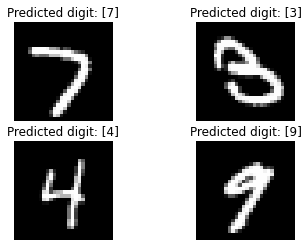

In [21]:
print ("Test images shape: {}".format(test_images.shape))
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)
    class_x = np.argmax(prediction,axis=1)
    print ("Predicted digit: {}".format(class_x))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(class_x))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))
plt.show()